# The Sparks Foundation -Data Science and Business Analytics Internship

# Author-Ansh Sudan

# Task 1:Prediction using Supervised Machine Learning

# Problem Statements: 

1.Predict the percentage of a student based on the no. of study hours.

2.What will be predicted scores if a student studies for 9.25 hrs/day?

In [3]:
#importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
# Reading data from remote link
s_data = pd.read_csv("http://bit.ly/w-data")
print("data imported successfully")

s_data.head(25)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking if there are any NULL values

In [5]:
s_data.isnull == True

False

There are no NULL values in the Dataset so,plot the data points on 2-D graph and see if we can find any relationship between the data.

# Exploratory Data Analysis:

Let's plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

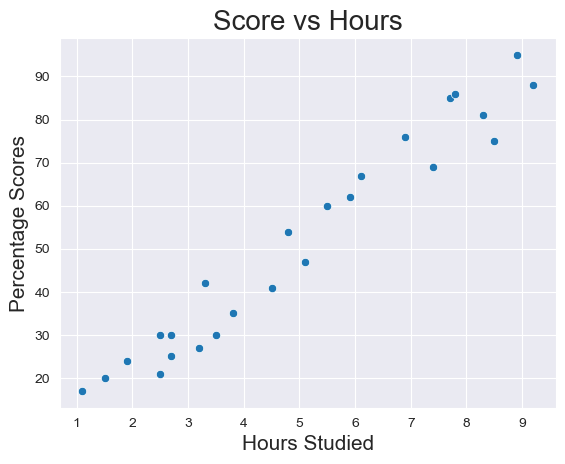

In [7]:
#plotting the distribution of scores

sns.set_style('darkgrid')
sns.scatterplot(y = s_data['Scores'],x = s_data['Hours'])
plt.title('Score vs Hours', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()

From the graph above,we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Plotting Regression line:

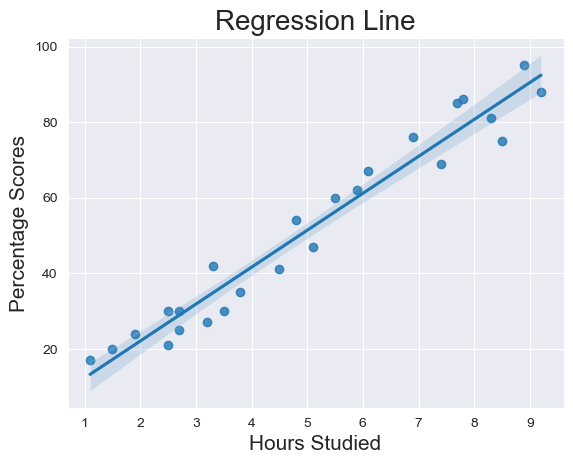

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x = s_data['Hours'],y = s_data['Scores'])
plt.title('Regression Line', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()
print(s_data.corr())

# Preparing the data:

The next step is to divide the data into "attributes"(inputs) and "labels"(outputs).

In [9]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:,1].values

# Splitting the data:

Now that we have our attributes and labels,the next step is to split this data into training and test sets.

In [10]:
#splitting our data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm:

We have split our data into training and testing sets,and now is finally the time to train our algorithm.

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")
print("Model Trained.")

Training complete.
Model Trained.


# Predicting the Percentage:

Now that we have trained our algorithm,it's time to make some predictions.

In [12]:
pred_y = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours':[i[0]for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


# Comparing the Actual and Predicted Marks: 

In [13]:
#Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Plotting Actual and Predicted Marks:

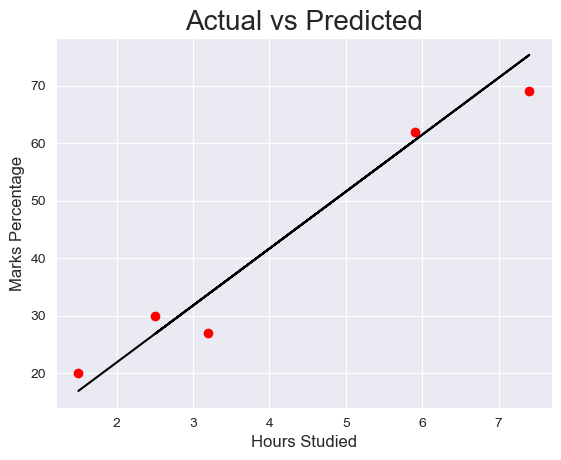

In [14]:
plt.scatter(x=X_test, y=y_test, color='Red')
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Predicting the score if studied for 9.25 hours/day:

In [15]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


In [ ]:
According to linear regression model,predicted score if a student studies for 9.25 hrs/day is 93.692

# Evaluating the model:

The final step is to evaluate the performance of algorithm using mean square error.

In [16]:
#mean absolute error to evaluate performance of the algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))

Mean Absolute Error: 4.183859899002982
